## **Trabajo Práctico Final: Exploratory Data Analysis**
____
**Universidad Tecnológica Nacional, Buenos Aires**\
**Ingeniería Industrial**\
**Ciencia de Datos** - Curso I5521\
**Grupo** N°11\
**Integrantes:** Leandro Del Sordo y Nicolas Ferreyra
____

# **INTRODUCCIÓN**

En un entorno altamente competitivo, las instituciones financieras enfrentan el desafío constante de diseñar estrategias de marketing más efectivas para captar y retener clientes. En este contexto, el presente trabajo aborda un problema planteado por un banco particular, que busca predecir cuáles de sus clientes es más probable que se suscriban a una campaña de marketing específica. La capacidad de identificar de manera precisa a estos clientes permitirá optimizar los recursos, reducir costos y aumentar la efectividad de las campañas, generando un impacto positivo tanto en los ingresos del banco como en la satisfacción de los clientes.

Para abordar este problema, se dispone de un conjunto de datos que comprende información de 45.211 clientes, descritos por 17 variables que reflejan características socioeconómicas, de comportamiento y de interacción con el banco.

Se cuenta con las siguientes características:


*   Age: Edad del cliente
*   Job: Tipo de empleo del cliente
*   Marital Status: Estado civil
*   Education: Educacion maxima alcanzada por el cliente
*   Credit: Si tiene deuda de crédito o no
*   Balance (euros): Promedio de saldo en la cuenta en el año
*   Housing Loan: Si tiene seguro de hogar o no
*   Personal Loan: Si tiene prestamos o no
*   Contact: Tipo con contacto del cliente
*   Last Contact Day: Ultimo dia de contacto con el cliente en el mes
*   Last Contact Month: Ultimo mes de contacto con el cliente en el anio
*   Last Contact Duration: Duracion del ultimo contacto con el cliente medido en segundos
*   Campaign: Cantidad de contactos al cliente durante esta campania, incluye el último contacto.
*   Pdays: Cantidad de dias que pasaron del último contacto con el cliente de una campania anterior. -1 significa que no hubo contacto previo
*   Previous: Cantidad de contactos previos a esta campania para cada cliente
*   Poutcome: Performance de la campania de marketing anterior para este cliente
*   Subscription: Si el cliente accede a la campania (1) o no (0).



# Objetivo

Elaborar un modelo de data science que permita predecir la probabilidad de **suscripción** de los clientes del banco a una campaña de marketing.

# Librerias utilizadas

Importamos las librerias utilizadas para el desarrollo del trabajo

In [ ]:
# Librerias Generales
from google.colab import drive
import numpy as np
import pandas as pd
import warnings

# Librerias para EDA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

warnings.filterwarnings("ignore")

# Descripción del Dataset

Para poder leer el dataset es necesario conectarse a la carpeta en Google Drive donde está ubicado

In [ ]:
# Montar Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Ruta al archivo en Google Drive
file_path = '/content/drive/My Drive/ClusterAI/bank_subscription.csv'


Leemos el dataset

In [ ]:
# Importo el dataset
clientes = pd.read_csv(file_path, delimiter=';',encoding='latin-1')

In [ ]:
# Verifico que se haya cargado correctamente
clientes.head()

,Age,Job,Marital Status,Education,Credit,Balance (euros),Housing Loan,Personal Loan,Contact,Last Contact Day,Last Contact Month,Last Contact Duration,Campaign,Pdays,Previous,Poutcome,Subscription
0,58.0,NaN,NaN,NaN,no,2143.0,yes,NaN,unknown,5,may,261.0,1,-1.0,0,unknown,0
1,44.0,technician,single,secondary,no,NaN,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,0
2,33.0,entrepreneur,NaN,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,NaN,0,unknown,0
3,47.0,NaN,married,unknown,no,1506.0,NaN,no,unknown,5,may,92.0,1,-1.0,0,unknown,0
4,33.0,unknown,single,unknown,NaN,1.0,no,no,unknown,5,may,NaN,1,NaN,0,unknown,0


In [ ]:
# Dimensiones del dataset
# np.shape(clientes)
print("El dataset importado tiene "+ str(np.shape(clientes)[0]) + " registros y " + str(np.shape(clientes)[1]) + " columnas")


El dataset importado tiene 45211 registros y 17 columnas


# **1° PARTE** - Analisis EDA

## Tipos de datos y variable objetivo

Una vez leido el dataset, verificamos la cantidad de datos nulos y los tipos de datos de las features

In [ ]:
# Muestra información de la cantidad de datos no nulos y el tipo de datos
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    40238 non-null  float64
 1   Job                    40238 non-null  object 
 2   Marital Status         40238 non-null  object 
 3   Education              40238 non-null  object 
 4   Credit                 40238 non-null  object 
 5   Balance (euros)        40238 non-null  float64
 6   Housing Loan           37525 non-null  object 
 7   Personal Loan          37525 non-null  object 
 8   Contact                45211 non-null  object 
 9   Last Contact Day       45211 non-null  int64  
 10  Last Contact Month     45211 non-null  object 
 11  Last Contact Duration  37525 non-null  float64
 12  Campaign               45211 non-null  int64  
 13  Pdays                  37525 non-null  float64
 14  Previous               45211 non-null  int64  
 15  Po

In [ ]:
# Visualizo algunas mediciones clave de las variables (cantidad, promedio, Quantiles)
clientes.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,40238.0,40.929768,10.631666,18.0,33.0,39.0,48.00,95.0
Balance (euros),40238.0,1367.154257,3079.452512,-8019.0,72.0,448.0,1425.75,102127.0
Last Contact Day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.00,31.0
Last Contact Duration,37525.0,258.511446,257.827942,0.0,103.0,180.0,319.00,4918.0
Campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.00,63.0
Pdays,37525.0,40.020546,99.728432,-1.0,-1.0,-1.0,-1.00,871.0
Previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.00,275.0
Subscription,45211.0,0.116985,0.321406,0.0,0.0,0.0,0.00,1.0


Visualizamos información sobre la variable objetivo (Subscription), analizando la cantidad de datos disponibles para cada tipo

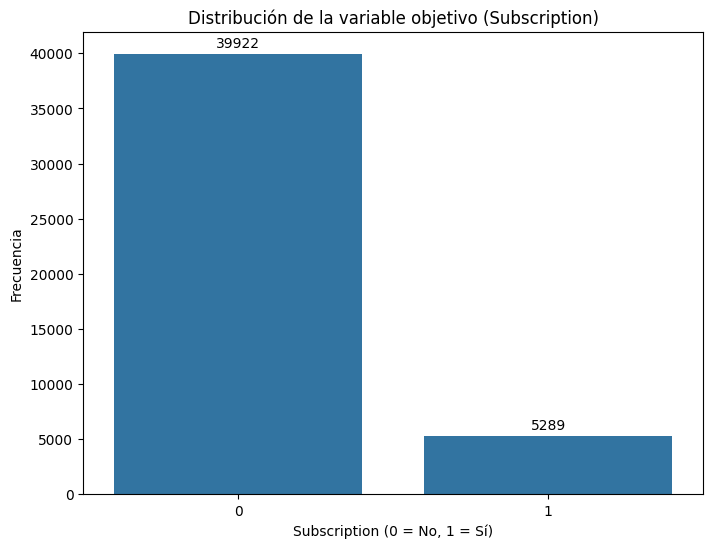

In [ ]:
# Gracifo countplot sobre Subscription
plt.figure(figsize=(8, 6))
ax = sns.countplot(x=clientes['Subscription'])
plt.title("Distribución de la variable objetivo (Subscription)")
plt.xlabel("Subscription (0 = No, 1 = Sí)")
plt.ylabel("Frecuencia")

# Agrego valores en cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


In [ ]:
print("De los datos se tiene que ", clientes['Subscription'].value_counts()[0], " clientes NO se suscribieron y ", clientes['Subscription'].value_counts()[1], " clientes si.")

De los datos se tiene que  39922  clientes NO se suscribieron y  5289  clientes si.


## Limpieza de datos

### Valores duplicados
Verificamos en caso de que haya registros duplicados y los eliminamos

In [ ]:
# Cuenta cuántos duplicados había antes de eliminar
duplicados_antes = clientes.duplicated().sum()

# Elimina duplicados manteniendo solo el primero
clientes.drop_duplicates(inplace=True, keep='first')

# Cuenta cuántos duplicados han sido eliminados
duplicados_despues = duplicados_antes - clientes.duplicated().sum()

print(f"Se eliminaron {duplicados_despues} duplicados.")

Se eliminaron 0 duplicados.


En este caso no hay duplicados por lo que no se modifica el dataset

### Analisis de NaN
Los datos nulos se van a tratar. Para eso, se verifican las feature que tienen datos nulos y lo que representan sobre el total de los datos

In [ ]:
# Cantidad de valores nulos ordenados descendentemente
total = clientes.isnull().sum().sort_values(ascending=False)
total.name = "Valores Nulos"
print(total)

Pdays                    7686
Housing Loan             7686
Personal Loan            7686
Last Contact Duration    7686
Age                      4973
Marital Status           4973
Education                4973
Credit                   4973
Balance (euros)          4973
Job                      4973
Poutcome                    0
Previous                    0
Contact                     0
Campaign                    0
Last Contact Month          0
Last Contact Day            0
Subscription                0
Name: Valores Nulos, dtype: int64


Tomando solo las columnas con nulos, se evalua el porcentaje de incidencia que tienen

In [ ]:
# Cantidad de valores nulos ordenados descendentemente
total = clientes.isnull().sum().sort_values(ascending=False)
# Porcetaje de lo que representa para cada columna
percent = (clientes.isnull().sum()/len(clientes)).sort_values(ascending=False)
# Mostramos los 2 resultados en conjunto.
missing_data = pd.concat([total, percent], axis=1, keys=['Total', '%'])
missing_data.head(10)

,Total,%
Pdays,7686,0.170003
Housing Loan,7686,0.170003
Personal Loan,7686,0.170003
Last Contact Duration,7686,0.170003
Age,4973,0.109995
Marital Status,4973,0.109995
Education,4973,0.109995
Credit,4973,0.109995
Balance (euros),4973,0.109995
Job,4973,0.109995


Dado que ninguna columna tiene un alto porcentaje, se considera que no es necesario eliminarlas, sino que se pueden completar los datos. Para eso se emplea alguna de las siguientes estrategias


*   Completar con el valor medio (promedio)
*   Completar con la mediana
*   Reemplazar con un valor unknown o -1
*   Eliminar el registro



In [ ]:
# Calcula el promedio de la columna 'Age', ignorando los valores nulos
mean_age = clientes['Age'].mean()

# Rellena los valores nulos con el promedio
clientes['Age'].fillna(mean_age, inplace=True)

In [ ]:
# Reemplaza los valores nulos de la columna 'Pdays' con -1 (valor que representa "que no hubo contacto previo con el cliente")
clientes['Pdays'].fillna(-1, inplace=True)

In [ ]:
# Calcula el promedio de la columna 'Last Contact Duration', ignorando los valores nulos
mean_contact = clientes['Last Contact Duration'].mean()

# Rellena los valores nulos con el promedio
clientes['Last Contact Duration'].fillna(mean_contact, inplace=True)

In [ ]:
# Reemplaza los valores nulos de la columna 'Education' con "unknown"
clientes['Education'].fillna("unknown", inplace=True)

In [ ]:
# Reemplaza los valores nulos de la columna 'Housing Loan' con "unknown"
clientes['Housing Loan'].fillna("unknown", inplace=True)

In [ ]:
# Reemplaza los valores nulos de la columna 'Personal Loan' con "unknown"
clientes['Personal Loan'].fillna("unknown", inplace=True)

In [ ]:
# Reemplaza los valores nulos de la columna 'Marital Status' con "unknown"
clientes['Marital Status'].fillna("unknown", inplace=True)

In [ ]:
# Reemplaza los valores nulos de la columna 'Credit' con "unknown"
clientes['Credit'].fillna("unknown", inplace=True)

Una vez que se hacen todos los reemplazos con las variables que se considera que se les puede asignar un valor directo a los NaN, se verifica como queda el dataset

In [ ]:
# Cantidad de valores nulos ordenados descendentemente
total = clientes.isnull().sum().sort_values(ascending=False)
# Porcetaje de lo que representa para cada columna
percent = (clientes.isnull().sum()/len(clientes)).sort_values(ascending=False)
# Mostramos los 2 resultados en conjunto
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
Balance (euros),4973,0.109995
Job,4973,0.109995
Age,0,0.000000
Last Contact Month,0,0.000000
Poutcome,0,0.000000
Previous,0,0.000000
Pdays,0,0.000000
Campaign,0,0.000000
Last Contact Duration,0,0.000000
Contact,0,0.000000


En este caso, quedan algunos registros con valores nulos que no se pueden asignar directamente un valor para completar, por lo tanto, en este caso se decide por eliminarlos. Esto es posible dado que representan únicamente alrededor de un 10% de las muestras y que hay suficientes datos para hacer las predicciones.

In [ ]:
# Limpiamos registros '.dropna'
clientes.dropna(how ='any', inplace = True)

In [ ]:
# Verificamos como quedo el dataset
print(f'Nos quedamos con un dataset de {clientes.shape[0]} filas x {clientes.shape[1]} columnas')

Nos quedamos con un dataset de 35814 filas x 17 columnas


In [ ]:
clientes.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,35814.0,40.956099,10.029364,18.0,33.0,40.929768,47.0,95.0
Balance (euros),35814.0,1366.600212,3084.639738,-8019.0,72.0,447.000000,1422.0,102127.0
Last Contact Day,35814.0,15.797370,8.320266,1.0,8.0,16.000000,21.0,31.0
Last Contact Duration,35814.0,258.905403,235.904361,0.0,119.0,225.000000,280.0,4918.0
Campaign,35814.0,2.765790,3.092165,1.0,1.0,2.000000,3.0,58.0
Pdays,35814.0,33.081812,92.087893,-1.0,-1.0,-1.000000,-1.0,854.0
Previous,35814.0,0.581784,2.398249,0.0,0.0,0.000000,0.0,275.0
Subscription,35814.0,0.117049,0.321483,0.0,0.0,0.000000,0.0,1.0


## Capping sobre valores atípicos
En el paso previo se observa que hay valores máximos que estan por fuera de los valores normales esperados para esa distribución de la variable. Para que no afecten a las predicciones, se aplica la técnica de capping reemplazando los valores con un percentil superior al 95%.

Se aplica sobre Campaign y Previous.

In [ ]:
# Aplicamos una tecnica de capping superior para Campaign y Previous
# Lista de columnas a procesar
cap_sup_cols = ["Campaign", "Previous"]

# Iteramos a través de las columnas y reemplazamos los valores que superan el percentil 95
for columna in cap_sup_cols:
    percentil_95 = np.percentile(clientes[columna], 95)
    clientes[columna] = np.where(clientes[columna] > percentil_95, percentil_95, clientes[columna])

clientes.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,35814.0,40.956099,10.029364,18.0,33.0,40.929768,47.0,95.0
Balance (euros),35814.0,1366.600212,3084.639738,-8019.0,72.0,447.000000,1422.0,102127.0
Last Contact Day,35814.0,15.797370,8.320266,1.0,8.0,16.000000,21.0,31.0
Last Contact Duration,35814.0,258.905403,235.904361,0.0,119.0,225.000000,280.0,4918.0
Campaign,35814.0,2.515134,1.907424,1.0,1.0,2.000000,3.0,8.0
Pdays,35814.0,33.081812,92.087893,-1.0,-1.0,-1.000000,-1.0,854.0
Previous,35814.0,0.380019,0.883299,0.0,0.0,0.000000,0.0,3.0
Subscription,35814.0,0.117049,0.321483,0.0,0.0,0.000000,0.0,1.0


Con el dataset modificado, vemos nuevamente como queda la distribución de la variable a predecir

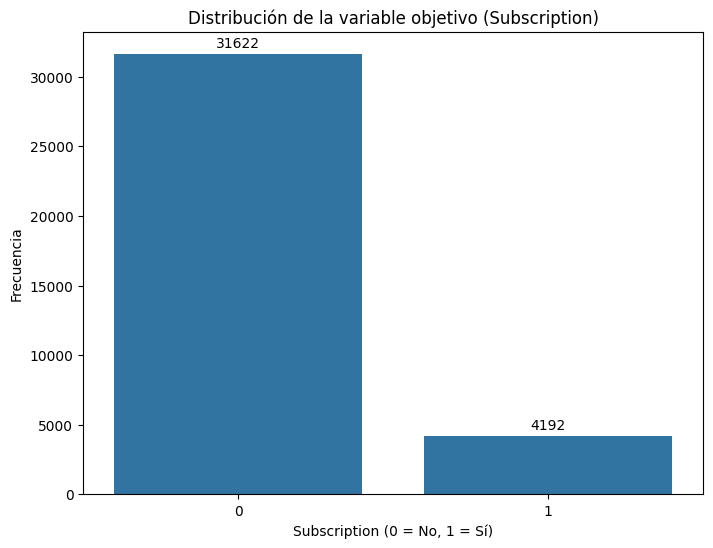

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x=clientes['Subscription'])
plt.title("Distribución de la variable objetivo (Subscription)")
plt.xlabel("Subscription (0 = No, 1 = Sí)")
plt.ylabel("Frecuencia")

# Agregar valores en cada barra sin decimales
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


In [ ]:
print("De los datos se tiene que ", clientes['Subscription'].value_counts()[0], " clientes NO se suscribieron y ", clientes['Subscription'].value_counts()[1], " clientes si.")

De los datos se tiene que  31622  clientes NO se suscribieron y  4192  clientes si.


## Agrupamiento de variables
La variable "Job" tiene varias categorias, por lo que aquellas con un porcentaje menor al 10% se pueden agrupar dentro de la categoria "Other", lo que puede ayudar a los modelos de ML a simplificar la predicción

In [ ]:
# Calcular la frecuencia de cada categoría
job_counts = clientes['Job'].value_counts()

# Definir un umbral: agrupar categorías con menos de 10% de los datos
threshold = 0.1 * len(clientes)
clientes['Job'] = clientes['Job'].apply(lambda x: x if job_counts[x] > threshold else 'Other')

# Verificar los cambios
print(clientes['Job'].value_counts())


Job
Other          10496
blue-collar     7746
management      7454
technician      6031
admin.          4087
Name: count, dtype: int64


# Análisis de features

## Distribución de las variables

Se analizan las variables para identificar relaciones entre ellas, evaluando cuán útiles son para predecir la variable objetivo. También se examina su distribución y las correlaciones existentes entre las variables.

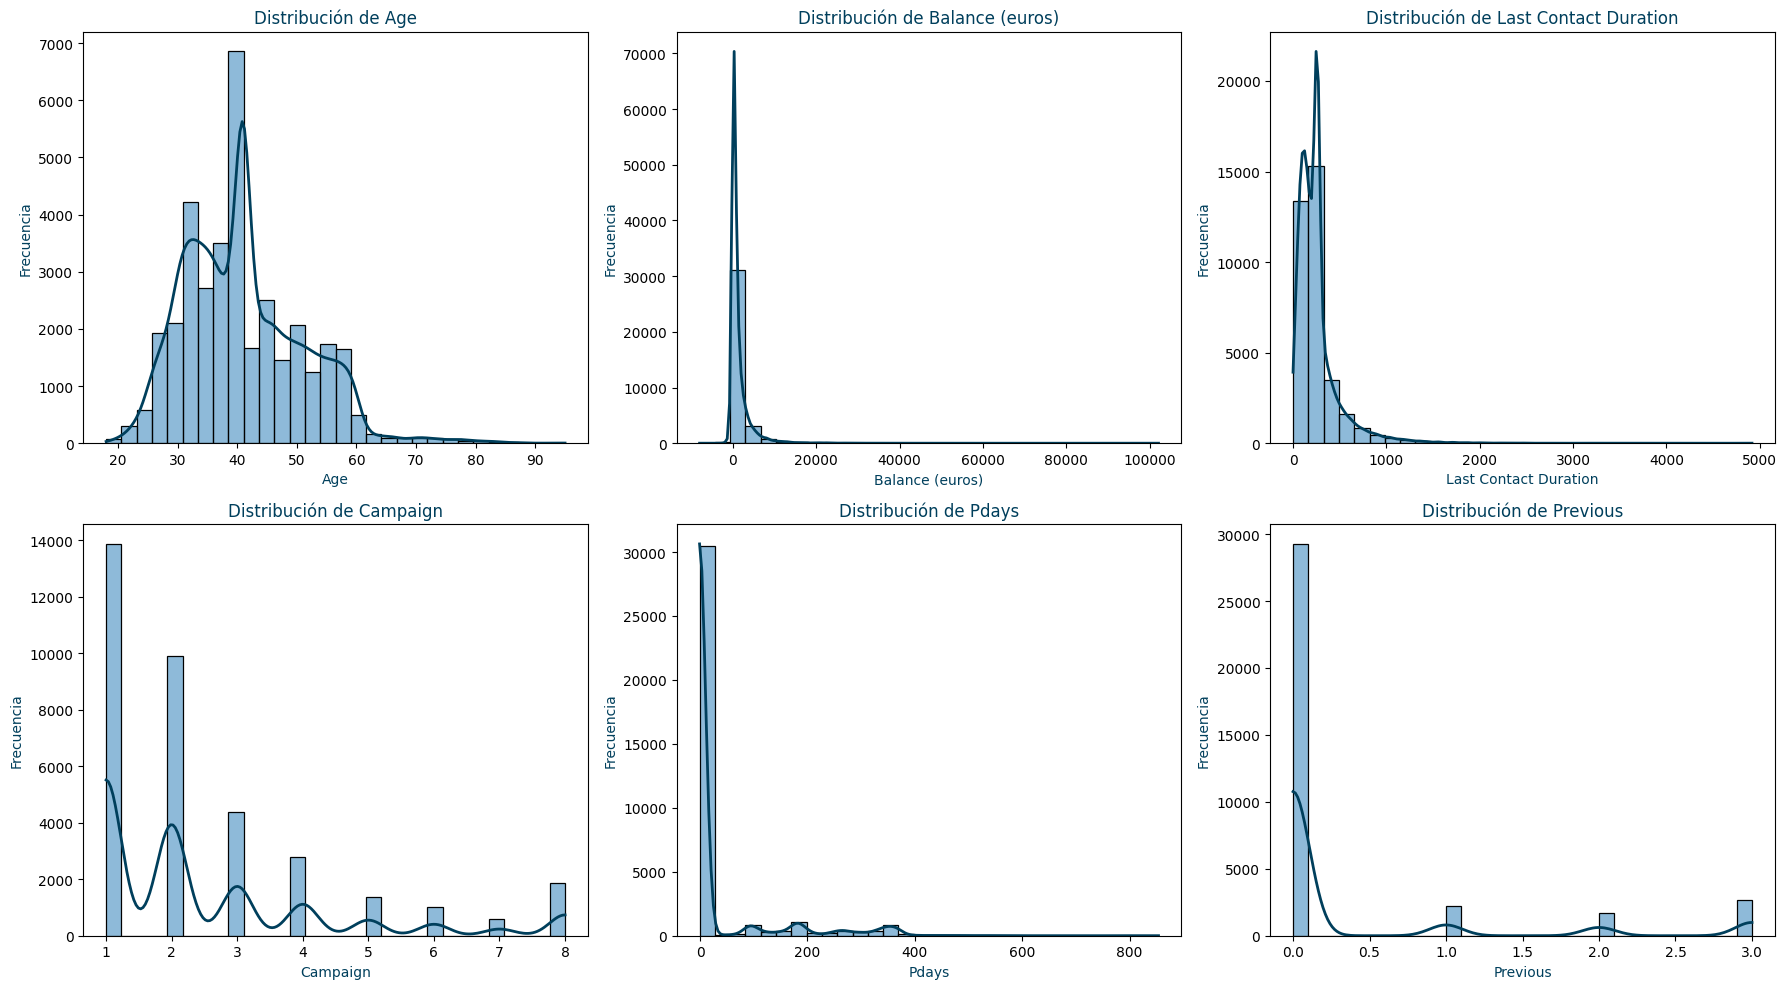

In [ ]:
# Distribuciones de variables numéricas
numerical_columns = ['Age', 'Balance (euros)', 'Last Contact Duration', 'Campaign', 'Pdays', 'Previous']

# Configurar la grilla (para la visualización)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

# Generar los gráficos en cada celda de la grilla
for i, col in enumerate(numerical_columns):
    sns.histplot(
        clientes[col].dropna(),
        kde=True,
        bins=30,
        color='#1f77b4',  # Azul más oscuro para las barras
        ax=axes[i]
    )
    # Modificar la línea KDE manualmente
    if axes[i].lines:  # Verificar si la curva KDE está presente
        axes[i].lines[0].set_color('#003f5c')  # Cambiar el color de la curva KDE
        axes[i].lines[0].set_linewidth(2)      # Cambiar el grosor de la línea

    axes[i].set_title(f"Distribución de {col}", color='#003f5c')  # Títulos en azul intenso
    axes[i].set_xlabel(col, color='#003f5c')
    axes[i].set_ylabel("Frecuencia", color='#003f5c')

# Ajustar espaciado entre gráficos
plt.tight_layout()
plt.show()


Los principales aspectos que se observan son:


*   Máxima cantidad de muestras de gente principalmente entre los 40 años
*   La mayor parte de los balances se distribuye entre los 0 a 10.000 euros



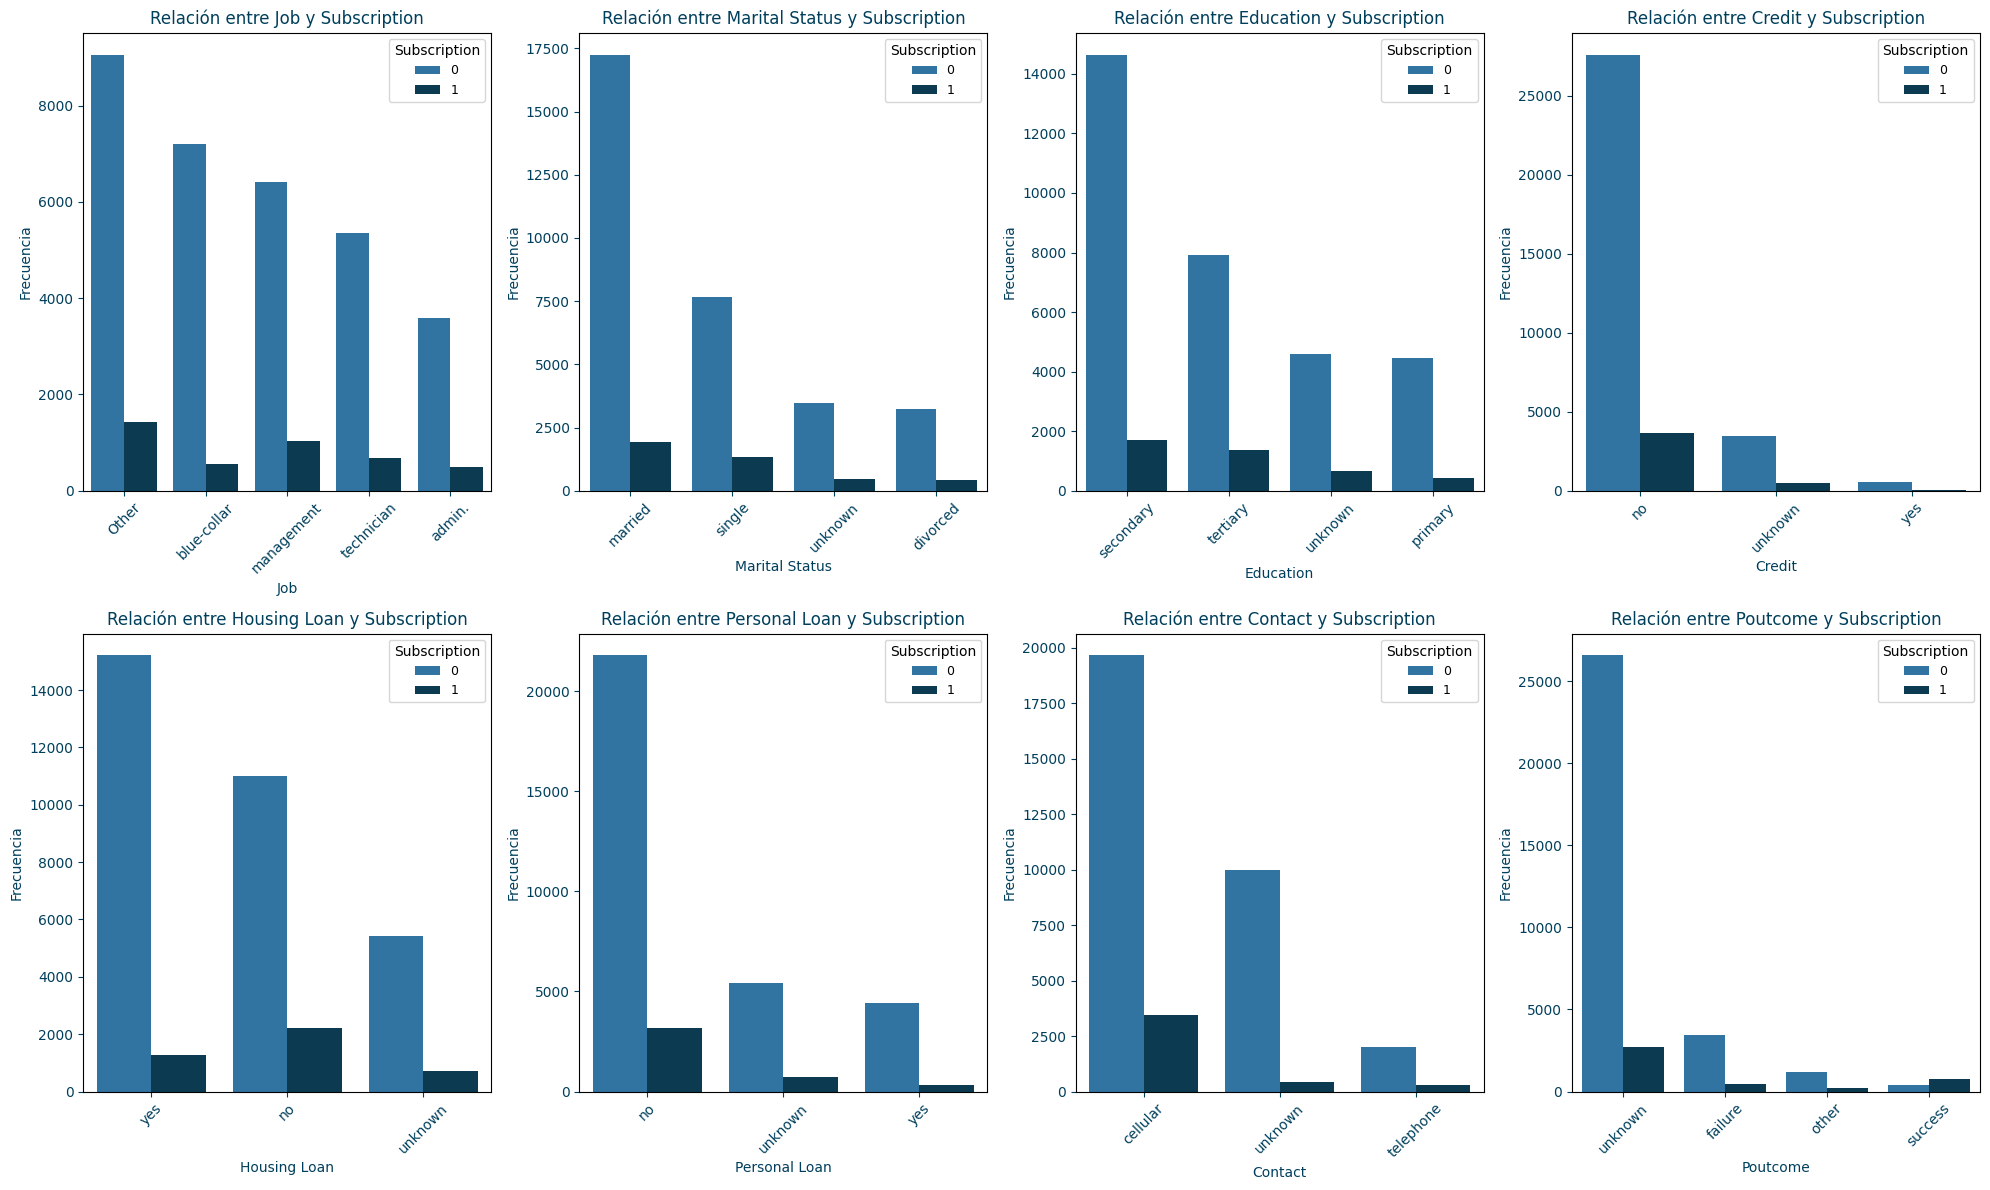

In [ ]:
# Relaciones entre variables categóricas y la variable objetivo
categorical_columns = ['Job', 'Marital Status', 'Education', 'Credit',
                       'Housing Loan', 'Personal Loan', 'Contact', 'Poutcome']

# Configurar la grilla (para la visualización)
fig, axes = plt.subplots(2, 4, figsize=(20, 12))
axes = axes.flatten()

# Generar los gráficos en cada celda de la grilla
for i, col in enumerate(categorical_columns):
    sns.countplot(
        x=col,
        hue='Subscription',
        data=clientes,
        order=clientes[col].value_counts().index,
        palette=['#1f77b4', '#003f5c'],  # Tonos de azul para las barras
        ax=axes[i]
    )
    axes[i].set_title(f"Relación entre {col} y Subscription", color='#003f5c')  # Título en azul intenso
    axes[i].set_xlabel(col, color='#003f5c')  # Etiquetas de eje en azul
    axes[i].set_ylabel("Frecuencia", color='#003f5c')  # Etiquetas de eje en azul
    axes[i].legend(title="Subscription", loc='upper right', title_fontsize=10, fontsize=9)
    axes[i].tick_params(axis='x', rotation=45, colors='#003f5c')  # Rotación y color de etiquetas del eje X
    axes[i].tick_params(axis='y', colors='#003f5c')  # Color de etiquetas del eje Y

# Ajustar espaciado entre gráficos
plt.tight_layout()
plt.show()


A simple vista permite observar que:


*   Para Potcume de Success, es mucho mas probable que el resultado de la campaña sea favorable
*   En caso de que no haya prestamos (del hogar o personales), pareciera ser más probable de obtener resultados positivos en la campaña
*   El resto de las variables no parecen indicar relaciones directas



## Matriz de correlación

Analizo la relación entre las variables, viendo cuan explicativa es una con la otra

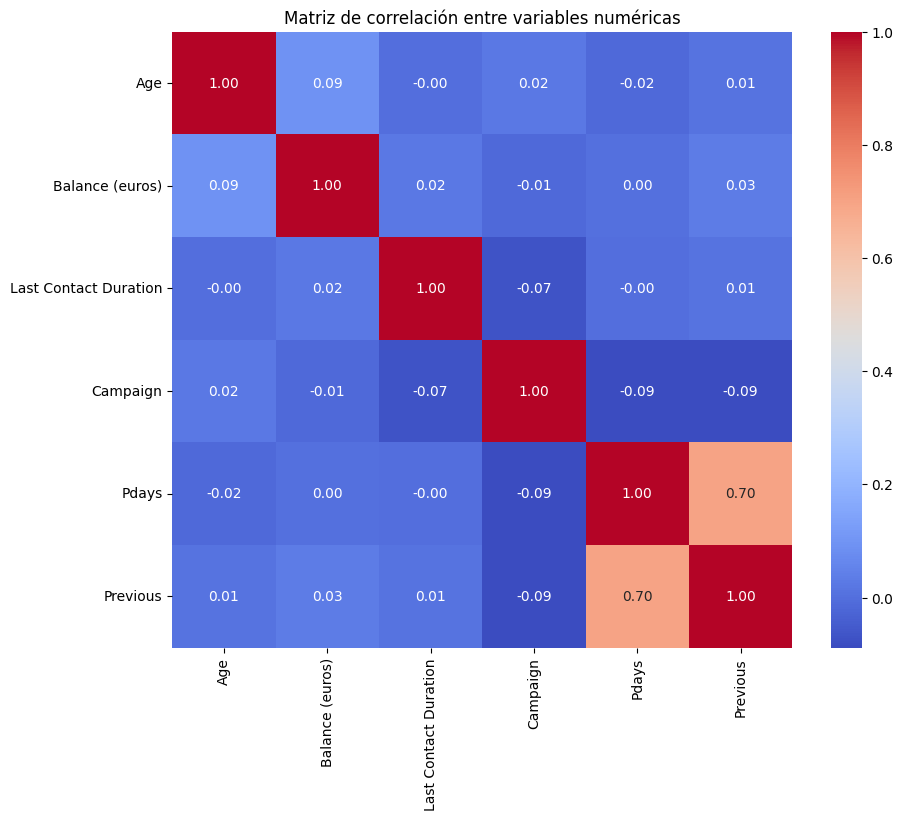

In [ ]:
# Matriz de correlación para variables numéricas
plt.figure(figsize=(10, 8))
correlation_matrix = clientes[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de correlación entre variables numéricas")
plt.show()

Pdays con Previous tienen una alta correlación, pudiendo usarse una para explicar la otra. El resto de las variables no muestran relación alguna.

## Boxplot

Se realiza un boxplot para ver la media de cada edad segun el outcome, asi como tambien los quantiles.

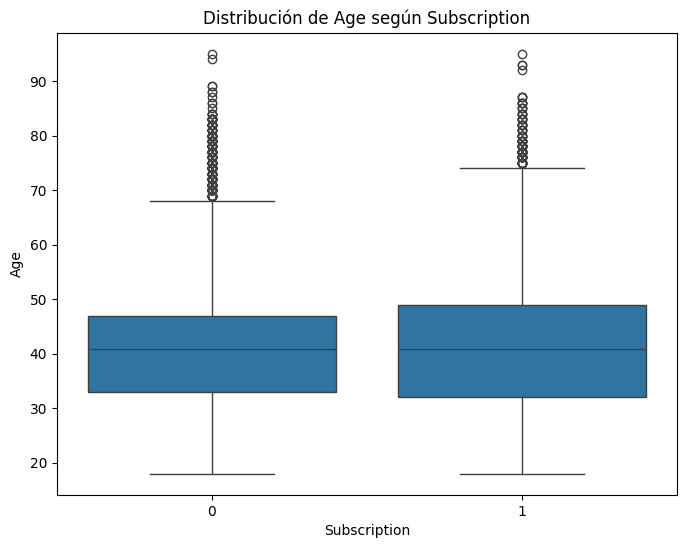

In [ ]:
# Boxplot de Edad en funcion al resultado de la campaña (Subscription)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Subscription', y='Age', data=clientes)
plt.title(f"Distribución de Age según Subscription")
plt.xlabel("Subscription")
plt.ylabel("Age")
plt.show()


## Dummies (variables categoricas)

Se crean los dummies de las variables para incluir información categórica en un modelo matemático. Esto permite mejorar las predicciones del modelo.

In [ ]:
# Crea un diccionario para mapear los meses a números
month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5,
    'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10,
    'nov': 11, 'dec': 12
}

# Reemplaza los valores de la columna de meses con sus equivalentes numéricos
clientes['Last Contact Month'] = clientes['Last Contact Month'].map(month_mapping)

# Verifica los cambios
print(clientes['Last Contact Month'].head())


2    5
4    5
6    5
8    5
9    5
Name: Last Contact Month, dtype: int64


In [ ]:
# Crea los dummies
clientes_new = pd.get_dummies(clientes, drop_first=True)

In [ ]:
# Nuevas dimensiones del dataset
print(f'Nos quedamos con un dataset de {clientes_new.shape[0]} filas x {clientes_new.shape[1]} columnas')

Nos quedamos con un dataset de 35814 filas x 30 columnas


In [ ]:
# Visualizamos como queda el dataset
clientes_new.head()

,Age,Balance (euros),Last Contact Day,Last Contact Month,Last Contact Duration,Campaign,Pdays,Previous,Subscription,Job_admin.,...,Credit_yes,Housing Loan_unknown,Housing Loan_yes,Personal Loan_unknown,Personal Loan_yes,Contact_telephone,Contact_unknown,Poutcome_other,Poutcome_success,Poutcome_unknown
2,33.0,2.0,5,5,76.000000,1.0,-1.0,0.0,0,False,...,False,False,True,False,True,False,True,False,False,True
4,33.0,1.0,5,5,258.511446,1.0,-1.0,0.0,0,False,...,False,False,False,False,False,False,True,False,False,True
6,28.0,447.0,5,5,217.000000,1.0,-1.0,0.0,0,False,...,False,False,True,False,True,False,True,False,False,True
8,58.0,121.0,5,5,50.000000,1.0,-1.0,0.0,0,False,...,False,False,True,False,False,False,True,False,False,True
9,43.0,593.0,5,5,55.000000,1.0,-1.0,0.0,0,False,...,False,False,True,False,False,False,True,False,False,True


# Guardado del modelo

Tras la transformación del dataset, se guarda dentro de la misma carpeta para poder tomarlo luego y usarlo en el modelo de ML

In [ ]:
# Especifico la ruta donde se guardará el archivo en Google Drive
file_path_new = '/content/drive/My Drive/ClusterAI/clientes_new.csv'

# Guardo el DataFrame como un archivo CSV
clientes_new.to_csv(file_path_new, index=False)

print(f"Archivo guardado en: {file_path}")


Archivo guardado en: /content/drive/My Drive/ClusterAI/bank_subscription.csv
